<a href="https://colab.research.google.com/github/DipyamanGoswami/Feynn_labs_internship/blob/main/feynn_labs_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df= pd.read_csv('/content/Indian automoble buying behavour study 1.0.csv')
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [3]:
df= df.drop(['Wife Working', 'Salary', 'Wife Salary'], axis=1)
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,2600000,SUV,1600000


In [5]:
def value_count(dataframe):

  for columns in dataframe:
    print(df[columns].value_counts())
    print("-----------------------------------")


value_count(df)

36    13
35    10
31     8
41     7
34     7
27     6
37     6
42     5
30     5
39     4
44     4
29     4
51     3
49     3
28     3
43     2
33     2
32     2
45     2
46     1
50     1
26     1
Name: Age, dtype: int64
-----------------------------------
Salaried    64
Business    35
Name: Profession, dtype: int64
-----------------------------------
Married    84
Single     15
Name: Marrital Status, dtype: int64
-----------------------------------
Post Graduate    56
Graduate         43
Name: Education, dtype: int64
-----------------------------------
3    34
2    29
0    22
4    14
Name: No of Dependents, dtype: int64
-----------------------------------
No     67
Yes    32
Name: Personal loan, dtype: int64
-----------------------------------
No     62
Yes    37
Name: House Loan, dtype: int64
-----------------------------------
1400000    8
2000000    7
2200000    6
1900000    5
2100000    5
1600000    5
1800000    4
2600000    4
900000     4
1300000    4
2400000    4
2700000    4
8

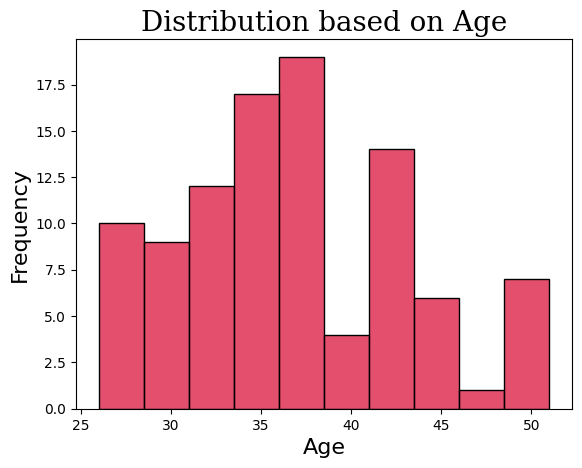

In [44]:
sns.histplot(data=df['Age'], bins=10, color='crimson')
plt.xlabel('Age', family='sans-serif', size=16)
plt.ylabel('Frequency', family='sans-serif', size=16)
plt.title('Distribution based on Age', family='serif', size=20)
plt.show()

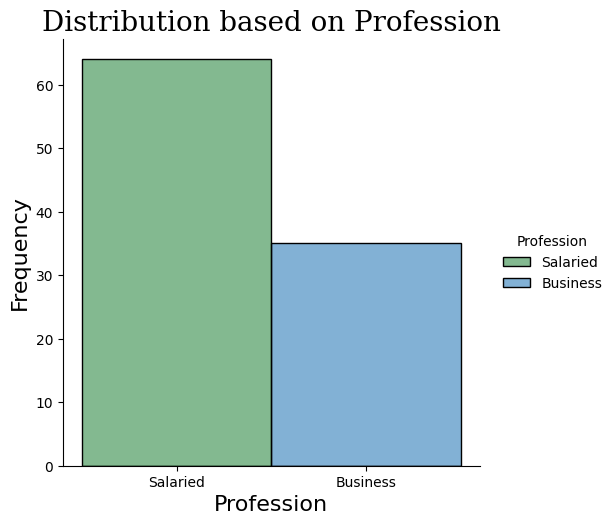

In [61]:
sns.set_palette('Paired', 9)
sns.displot(data=df, x='Profession', hue='Profession', palette=['#087523', '#0765AD'])
plt.xlabel('Profession', family='sans-serif', size=16)
plt.ylabel('Frequency', family='sans-serif', size=16)
plt.title('Distribution based on Profession', family='serif', size=20)
plt.show()

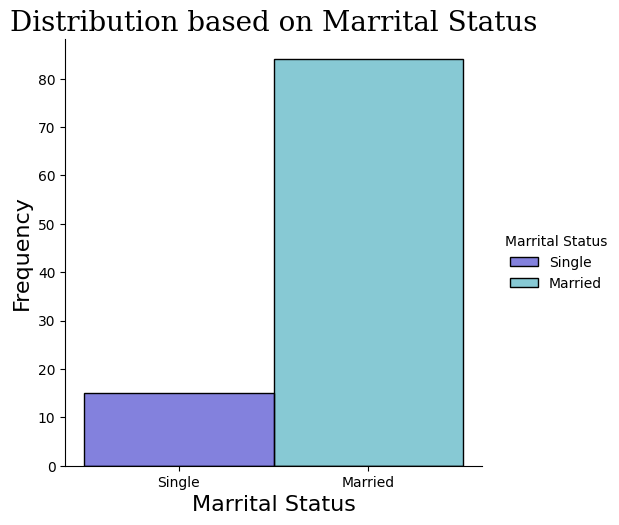

In [66]:
sns.set_palette('Paired', 9)
sns.displot(data=df, x='Marrital Status', hue='Marrital Status', palette=['#0904BC', '#1195AB'])
plt.xlabel('Marrital Status', family='sans-serif', size=16)
plt.ylabel('Frequency', family='sans-serif', size=16)
plt.title('Distribution based on Marrital Status', family='serif', size=20)
plt.show()

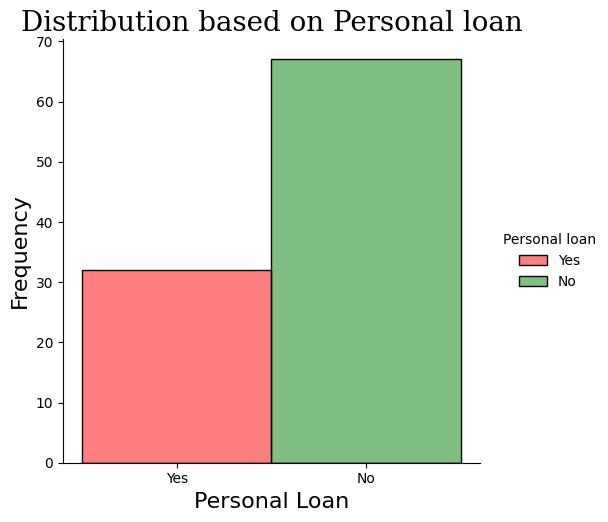

In [67]:
sns.set_palette('Paired', 9)
sns.displot(data=df, x='Personal loan', hue='Personal loan', palette=['red', 'green'])
plt.xlabel('Personal Loan', family='sans-serif', size=16)
plt.ylabel('Frequency', family='sans-serif', size=16)
plt.title('Distribution based on Personal loan', family='serif', size=20)
plt.show()

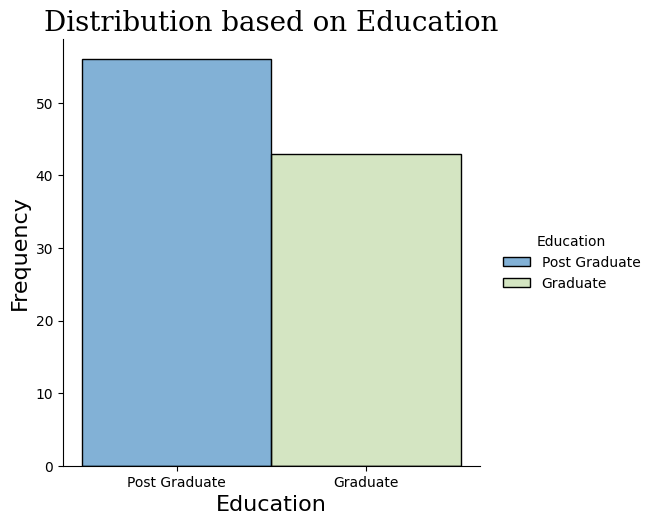

In [68]:
sns.set_palette('Paired', 9)
sns.displot(data=df, x='Education', hue='Education', palette=['#0765AE', '#ABCD86'])
plt.xlabel('Education', family='sans-serif', size=16)
plt.ylabel('Frequency', family='sans-serif', size=16)
plt.title('Distribution based on Education', family='serif', size=20)
plt.show()

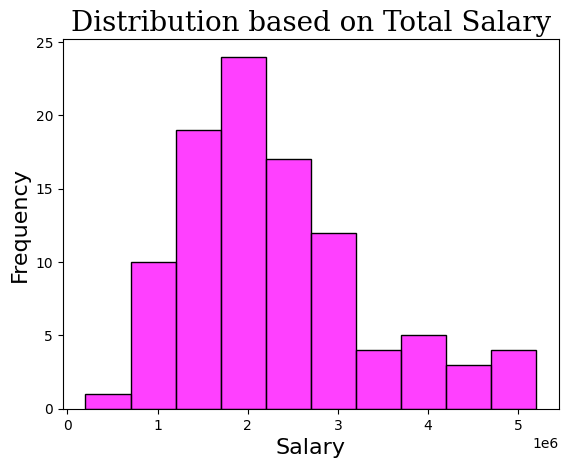

In [65]:
sns.histplot(data=df['Total Salary'], bins=10, color='magenta')
plt.xlabel('Salary', family='sans-serif', size=16)
plt.ylabel('Frequency', family='sans-serif', size=16)
plt.title('Distribution based on Total Salary', family='serif', size=20)
plt.show()

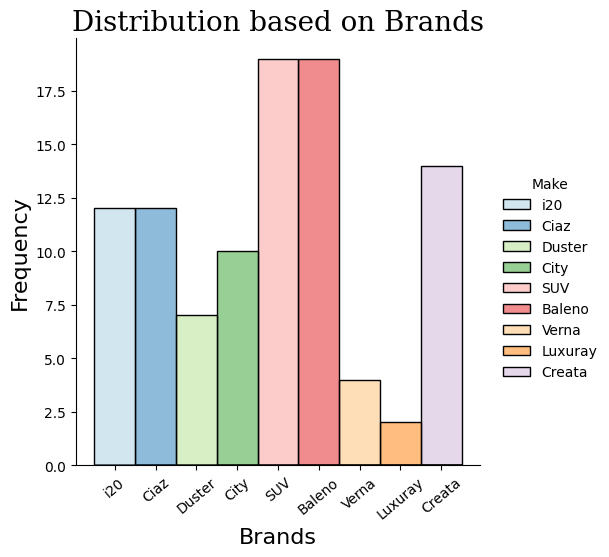

In [15]:
sns.set_palette('Paired', 9)
sns.displot(data=df, x='Make', hue='Make', bins=9)
plt.xticks(rotation=40)
plt.xlabel('Brands', family='sans-serif', size=16)
plt.ylabel('Frequency', family='sans-serif', size=16)
plt.title('Distribution based on Brands', family='serif', size=20)
plt.show()

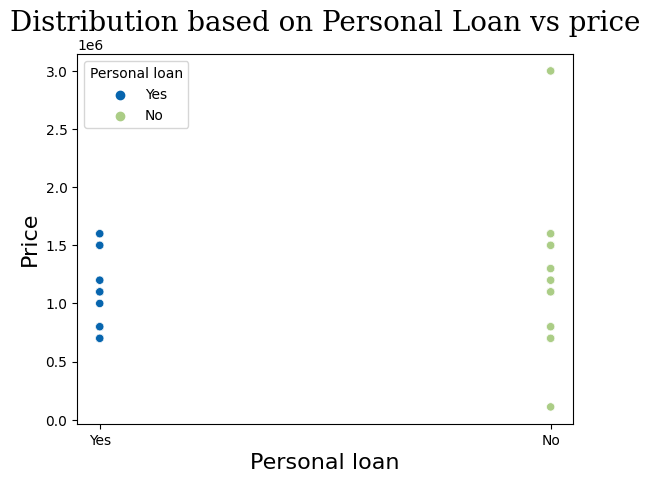

In [4]:
#sns.set_palette('Paired', 9)
sns.scatterplot(data=df, x='Personal loan', y='Price', hue='Personal loan', palette=['#0765AE', '#ABCD86'])
plt.xlabel('Personal loan', family='sans-serif', size=16)
plt.ylabel('Price', family='sans-serif', size=16)
plt.title('Distribution based on Personal Loan vs price', family='serif', size=20)
plt.show()

In [6]:
df['Marrital Status'].replace(to_replace=['Single','Married'],value=[0, 1],inplace=True)
df['Education'].replace(to_replace=['Graduate','Post Graduate'],value=[0, 1],inplace=True)
df['Personal loan'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
df['Profession'].replace(to_replace=['Salaried','Business'],value=[0, 1],inplace=True)
df['House Loan'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
df['Make'].replace(to_replace=['i20','Ciaz', 'Duster', 'City', 'SUV', 'Baleno', 'Verna', 'Luxuray', 'Creata'],value=[0,1,2,3,4,5,6,7,8], inplace=True)

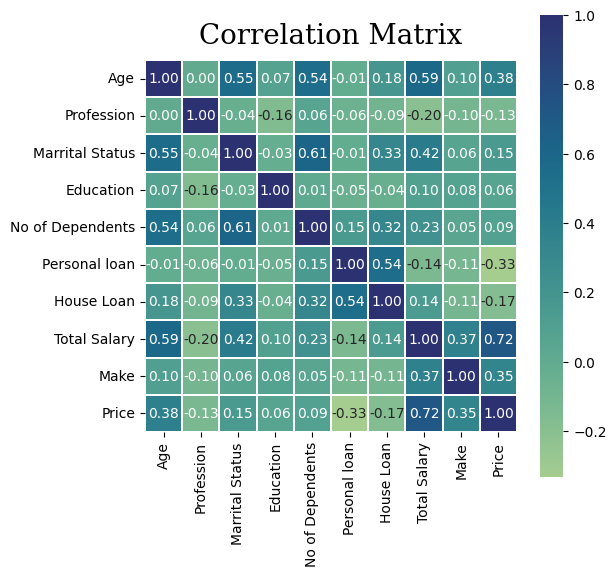

In [7]:
plt.figure(figsize=(6,6))
sns.heatmap(data=df.corr(), annot=True, cmap='crest', cbar=True, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=20, pad=12);

In [8]:
# Feature Scaling

scaler=StandardScaler()
df_scaled= scaler.fit_transform(df)

df_scaled[:5]

array([[-1.4986304 , -0.73950997, -2.36643191,  0.87627458, -1.64231252,
         1.44697961, -0.77251161, -1.40676   , -1.53241904, -0.90484292],
       [-0.21130364, -0.73950997,  0.42257713,  0.87627458, -0.13685938,
         1.44697961,  1.29447892, -0.25893659, -1.13000661, -0.44557889],
       [ 1.39785482,  1.35224681,  0.42257713, -1.1411948 ,  1.36859377,
         1.44697961,  1.29447892, -0.4502405 , -0.72759419,  0.01368514],
       [ 0.75419144,  1.35224681,  0.42257713,  0.87627458,  0.6158672 ,
        -0.69109474, -0.77251161, -0.06763269, -0.32518176,  0.01368514],
       [-0.85496702, -0.73950997,  0.42257713,  0.87627458, -0.13685938,
         1.44697961, -0.77251161,  0.31497511,  0.07723067,  0.9322132 ]])

In [9]:
# Principal Component Analysis

pca = PCA(n_components=8)
X_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-3.718328,-0.081989,-1.682016,-0.585900,0.410138,-1.087095,1.089091,-0.039519
1,-0.213230,-1.853199,-1.431257,-0.592691,0.500666,-0.608892,-0.258228,-0.051402
2,0.945106,-2.577030,1.335731,0.646577,-0.406118,-0.868254,0.740425,-0.160393
3,0.502962,0.293196,1.413712,-1.457052,-0.575101,-0.284249,0.109177,0.125137
4,0.174227,0.307019,-1.329754,-0.132808,-0.132823,-0.158982,0.596250,-0.493050


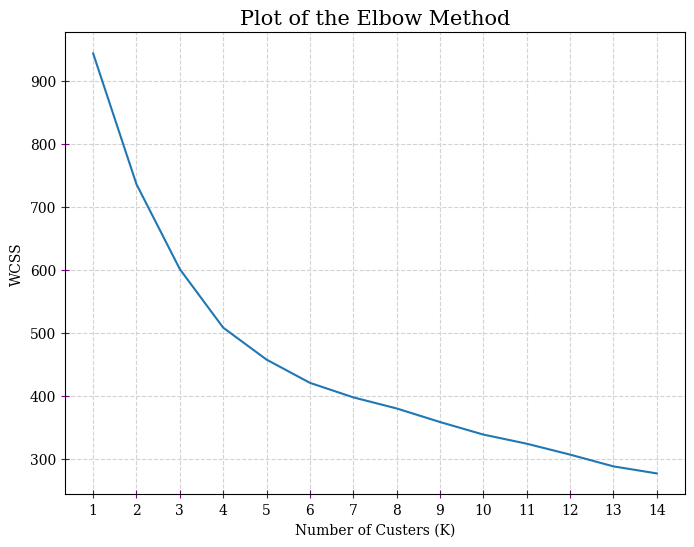

In [10]:
import warnings

warnings.filterwarnings('ignore')
wcss = []

for i in range(1, 15):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 15), wcss)
plt.xticks(range(1, 15), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [73]:
# training the model with k=4 number of clusters as determined from the graph

kmean= KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=90)

In [74]:
print(kmean.labels_)

[1 0 0 2 3 0 2 2 2 0 3 0 1 1 0 3 1 1 1 2 3 2 2 2 0 2 0 2 0 3 2 2 3 2 0 3 2
 3 1 2 0 2 2 2 0 3 2 2 0 3 2 3 3 3 3 3 2 1 1 1 1 1 1 0 2 2 3 2 3 2 2 3 2 3
 2 3 0 2 3 3 0 3 0 3 0 0 1 2 3 0 2 3 2 1 1 3 0 3 0]


In [75]:
pd.DataFrame(kmean.labels_).value_counts()

2    33
3    28
0    22
1    16
dtype: int64

In [76]:
df['clusters']= kmean.labels_
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Total Salary,Make,Price,clusters
0,27,0,0,1,0,1,0,800000,0,800000,1
1,35,0,1,1,2,1,1,2000000,1,1000000,0
2,45,1,1,0,4,1,1,1800000,2,1200000,0
3,41,1,1,1,3,0,0,2200000,3,1200000,2
4,31,0,1,1,2,1,0,2600000,4,1600000,3


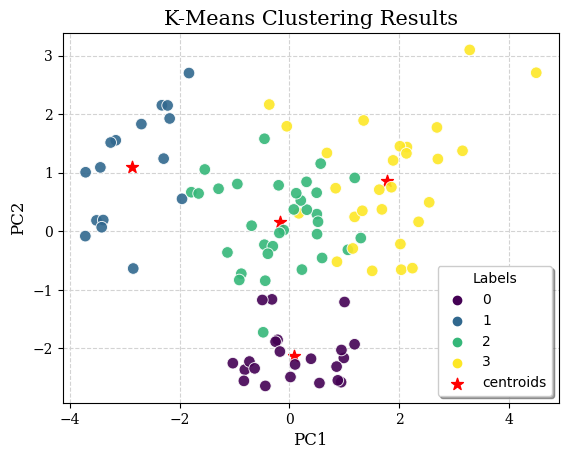

In [91]:
# visualizing clusters
sns.scatterplot(data=df_pca, x='PC1', y='PC2', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC2', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()